In [1]:
#Visualise drift lines

In [2]:

#INITIALIZION
#Kernel PyROOT
import os
#os.sys.path.append('/usr/common/software/rootpy')
#os.sys.path.insert(0,'/usr/common/software/uproot')
#import root_numpy
#import root_numpy as root_np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('GTK3Agg')
import ROOT
import pandas as pd
from scipy.optimize import curve_fit

import sys
from matplotlib.colors import LogNorm
import pylab

import glob
import uproot

import scipy
from scipy.optimize import curve_fit

%pylab inline
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

print("Starting notebook....")




Welcome to JupyROOT 6.16/00
Populating the interactive namespace from numpy and matplotlib
Starting notebook....


/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#Function to turn file into arrays
def Get_drift_line_arrays(filename):
    file = open(filename, 'r')
    lines = file.readlines()

    #print len(lines)
    #print lines[2]

    rIN_cm = float(lines[10].split('\t\t')[0])
    zIN_cm = float(lines[10].split('\t\t')[1])

    DriftTime_us_list = []
    r_cm_list = []
    z_cm_list = []

    DriftTime_us_list.append(0.0)
    r_cm_list.append(rIN_cm)
    z_cm_list.append(zIN_cm)

    for i in range(0,len(lines)):
        if lines[i].startswith('#'):
            continue
        else:
            a = lines[i].split('\t\t')
            #print a
            DriftTime_us_list.append(float(a[2]))
            r_cm_list.append(float(a[3]))
            z_cm_list.append(float(a[4]))
    return np.asarray(r_cm_list), np.asarray(z_cm_list), np.asarray(DriftTime_us_list)

def Get_file_length(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    return len(lines)


def Get_i_line_from_file(filename, i):
    file = open(filename, 'r')
    lines = file.readlines()
    a = lines[i].split('\t\t')
    DriftTime_us= float(a[2])
    r_cm = float(a[3])
    z_cm = float(a[4])
    return r_cm, z_cm, DriftTime_us


print "\n\t...Done!"


	...Done!


In [4]:
#Get all txt files in directory
file_list=[]
for file in os.listdir("/data/rossiter/lz/EDM_DiffusionAnalysis_2005/r30/"):
    if file.endswith(".txt"):
        print(os.path.join(file))
        file_list.append("/data/rossiter/lz/EDM_DiffusionAnalysis_2005/r30/"+os.path.join(file))

SingleDiffusionLineMC_TimeStep_.32us_r30._100.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._10.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._11.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._12.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._13.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._14.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._15.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._16.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._17.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._18.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._19.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._1.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._20.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._21.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._22.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._23.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._24.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._25.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._26.txt
SingleDiffusionLineMC_TimeStep_.32us_r30._27.txt
SingleDiffusionLineM

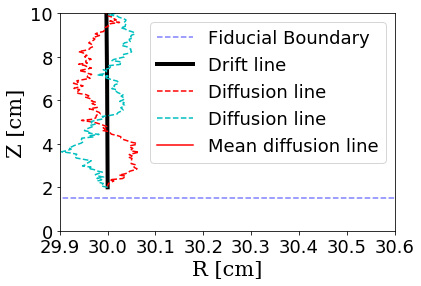

In [22]:
#A little diffusion
size1=18
size2=21
pop=-2
filename="SingleDriftLineCalc_.5cm_r30cm_z02.0cm_0504.txt"
plt.plot([0,68.8], [1.5,1.5], '--', c='blue', alpha=.5, label='Fiducial Boundary')
r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(filename)
plt.plot(r_cm_array[:pop], z_cm_array[:pop], '-k', linewidth=4, label='Drift line')

r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(file_list[0])
plt.plot(r_cm_array, z_cm_array, '--r', label='Diffusion line')

r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(file_list[7])
plt.plot(r_cm_array, z_cm_array, '--c', label='Diffusion line')


plt.plot([100,101], [100,101], '-r', label='Mean diffusion line')
plt.xlabel('R [cm]',fontsize=size2,family='serif')
plt.ylabel('Z [cm]',fontsize=size2,family='serif')

plt.xticks(fontsize=size1)
plt.yticks(fontsize=size1)

plt.xlim(29.9,30.6)
plt.ylim(0,10)
plt.legend(loc='best', fontsize=size1)


100


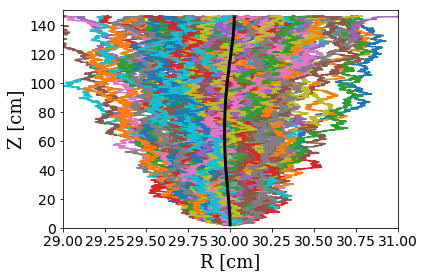

In [6]:
#
#pop=-2

figure(1)
for i in range(0, len(file_list)):
    r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(file_list[i])
    #print file_list[i]
    #print Diff_z_cm_array[-1]
    
    if file_list[i].startswith('SingleDriftLineCalc'):
        plt.plot(r_cm_array[:pop], z_cm_array[:pop], '-k', linewidth=3, label='Drift line')
    else:
        plt.plot(r_cm_array, z_cm_array, '-', label='Diffusion line')
        

#filename="SingleDriftLineCalc_.5cm_r30cm_z01cm_0504.txt"
r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(filename)
plt.plot(r_cm_array[:pop], z_cm_array[:pop], '-k', linewidth=3, label='Drift line')

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#pylab.legend(loc='best', fontsize=12)

plt.ylim(0, 150)
plt.xlim(29,31)

print len(file_list)

Final R and DT for diffusion and drift lines


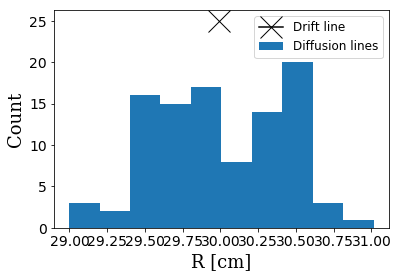

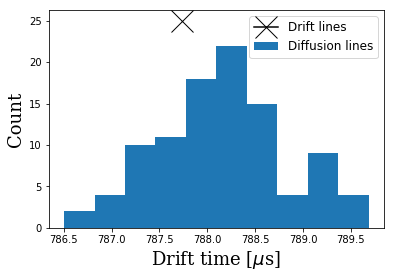

In [7]:
#Get last r entry from each drift line



r_list = []
z_list = []
t_list = []
j=-1
#print j
for f in file_list[:-1]:
    r,z,t= Get_i_line_from_file(f,j)
    r_list.append(r)
    z_list.append(z)
    t_list.append(t)
    
#print r_list

#filename="../SingleDriftLineCalc_.5cm_r30cm_z0.5cm_0504.txt"
r,z,t=Get_i_line_from_file(filename,pop)

figure(1)
plt.hist(r_list,label='Diffusion lines')
plt.plot([r], [25], marker="x", color='k', markersize=22, label='Drift line')

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Count',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
pylab.legend(loc='best', fontsize=12)

figure(3)
plt.hist(t_list,  label='Diffusion lines')
plt.plot([t], [25], marker="x", color='black', markersize=22, label='Drift lines')
plt.xlabel('Drift time [$\mu$s]',fontsize=18,family='serif')
plt.ylabel('Count',fontsize=18,family='serif')
pylab.legend(loc='best', fontsize=12)

print "Final R and DT for diffusion and drift lines"

In [8]:
#Get min length of file
min_length =99999
for f in file_list:
    length = Get_file_length(f)
    if length < min_length:
        min_length = length
        
print min_length

2462


In [9]:
#Try averaging together 10 diffusion lines
mean_r_list = []
mean_z_list = []
mean_t_list = []

for i in range(1, min_length-4):
    r_list = []
    z_list = []
    t_list = []
    j=-1*i
    #print j
    for f in file_list[:-1]:
        r,z,t= Get_i_line_from_file(f,j)
        r_list.append(r)
        z_list.append(z)
        t_list.append(t)
        #print "("+str(r)+", "+str(z)+", "+str(t)+")"
    #print "("+str(np.mean(r_list))+", "+str(np.mean(z_list))+", "+str(np.mean(t_list))+")"
    #print "\n"
    mean_r_list.append(np.mean(r_list))
    mean_z_list.append(np.mean(z_list))
    mean_t_list.append(np.mean(t_list))

print "len(mean_r_list) = "+str(len(mean_r_list))
print "len(mean_z_list) = "+str(len(mean_z_list))
print "len(mean_t_list) = "+str(len(mean_t_list))

print"\n"
for i in range(0, 5):
    print str(mean_r_list[i])+"\t"+str(mean_z_list[i])+"\t"

print "\n\t..Done!"


len(mean_r_list) = 2457
len(mean_z_list) = 2457
len(mean_t_list) = 2457


30.010084848484848	146.09999999999997	
30.010222222222225	146.0681212121212	
30.008318181818183	146.00475757575757	
30.007473737373736	145.9407474747475	
30.006382828282835	145.8769292929293	

	..Done!


(29, 31)

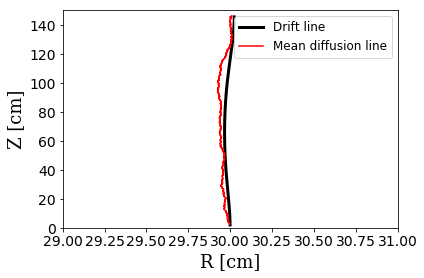

In [10]:
#pop=-2
#filename="SingleDriftLineCalc_.5cm_r30cm_z01cm_0504.txt"
r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(filename)

figure(1)
plt.plot(r_cm_array[:pop], z_cm_array[:pop], '-k', linewidth=3, label='Drift line')
plt.plot(mean_r_list, mean_z_list, '-r', label='Mean diffusion line')

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
pylab.legend(loc='best', fontsize=12)

plt.ylim(0, 150)
plt.xlim(29,31)

(0, 150)

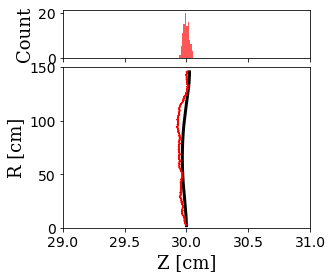

In [11]:
##x = np.random.rand(50)
##y = np.random.rand(50)

fig = plt.figure()

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.plot(r_cm_array[:pop], z_cm_array[:pop], '-k', linewidth=3, label='Drift line')
ax_joint.plot(mean_r_list, mean_z_list, '-r', label='Mean diffusion line')

"""
plt.hist(r_list,label='Diffusion lines')
plt.plot(r, 25, marker="x", markersize=22, label='Drift line')
"""


ax_marg_x.hist(np.array(r_list), color='red', alpha=.66)
#ax_marg_x.plot(r, 25, marker="x", color='black', markersize=22, label='Drift line')

## Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)

## Set labels on joint
ax_joint.set_xlabel('Joint x label')
ax_joint.set_ylabel('Joint y label')

ax_joint.set_ylabel('R [cm]',fontsize=18,family='serif')
ax_joint.set_xlabel('Z [cm]',fontsize=18,family='serif')
ax_joint.tick_params(axis='both', which='major', labelsize=14)
ax_joint.tick_params(axis='both', which='major', labelsize=14)



## Set labels on marginals
ax_marg_x.set_ylabel('Count',fontsize=18,family='serif')

ax_marg_x.tick_params(axis='both', which='major', labelsize=14)



##ax_marg_x.set_xticks(fontsize=14)
ax_joint.set_xlim(29,31)
ax_marg_x.set_xlim(29,31)

ax_joint.set_ylim(0, 150)


In [12]:
print "hello"

hello
